In [20]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [21]:
dataset = pd.read_csv("../datasets/emscad_v1.csv")
#print(dataset.head())
#print(dataset.shape)

def duplicatedChecking(df):
    print("Number of duplicated rows detected",df.duplicated().sum()) # Check for Duplicated rows
    df.drop_duplicates(inplace=True) #Remove dupes
    print("Duplicated rows removed, updated rows",df.shape)

In [22]:
dataset[['country', 'state', 'city']] = dataset['location'].str.split(', ', expand=True, n = 2) #Seperating location column into respective categories 
location_to_fill_na = ['country', 'state', 'city'] 
dataset[location_to_fill_na] = dataset[location_to_fill_na].replace('', np.nan) #Fill empty fields with NaN

dataset[['min_salary', 'max_salary']] = dataset['salary_range'].str.split('-', expand=True, n = 1) #Seperating salary column into respective categories 
salary_to_fill_na = ['min_salary', 'max_salary']
dataset[salary_to_fill_na] = dataset[salary_to_fill_na].replace('', np.nan) #Fill empty fields with NaN   

dataset = dataset.drop(['location', 'salary_range'], axis=1)

In [23]:
duplicatedChecking(dataset) 
print(dataset.info()) # Check col datatypes
print(dataset.describe()) 

print(dataset.columns[3]) # salary range

Number of duplicated rows detected 235
Duplicated rows removed, updated rows (17645, 21)
<class 'pandas.core.frame.DataFrame'>
Index: 17645 entries, 0 to 17879
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17645 non-null  object
 1   department           6283 non-null   object
 2   company_profile      14358 non-null  object
 3   description          17645 non-null  object
 4   requirements         14995 non-null  object
 5   benefits             10542 non-null  object
 6   telecommuting        17645 non-null  object
 7   has_company_logo     17645 non-null  object
 8   has_questions        17645 non-null  object
 9   employment_type      14210 non-null  object
 10  required_experience  10669 non-null  object
 11  required_education   9617 non-null   object
 12  industry             12796 non-null  object
 13  function             11267 non-null  object
 14  fraudulent        

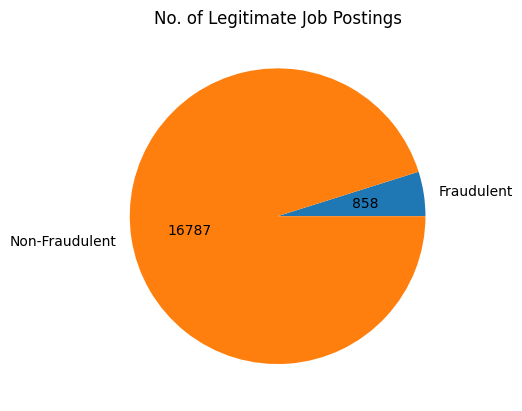

In [24]:
#Pie Chart displaying the number of fraudulent and legitimate jobs
dataset['fraudulent'] = dataset['fraudulent'].apply(lambda x: 1 if x == "t" else 0)
fraud_count = (dataset['fraudulent'] == 1).sum()
nonfraud_count = (dataset['fraudulent'] == 0).sum()
fraudpie = np.array([fraud_count, nonfraud_count])
labels = ["Fraudulent", "Non-Fraudulent"]
plt.pie(fraudpie, labels = labels, autopct=lambda p: '{:.0f}'.format(p * sum(fraudpie) / 100))
plt.title('No. of Legitimate Job Postings')
plt.show()

In [29]:
# Count the times a country appears in the dataset
item_counts = Counter(dataset['country'])

print (item_counts)

Counter({'US': 10495, 'GB': 2336, 'GR': 939, 'CA': 450, 'DE': 382, nan: 343, 'NZ': 330, 'IN': 274, 'AU': 213, 'PH': 132, 'NL': 126, 'BE': 117, 'IE': 112, 'SG': 80, 'HK': 77, 'PL': 76, 'IL': 72, 'EE': 71, 'FR': 68, 'ES': 66, 'AE': 54, 'EG': 50, 'SE': 49, 'RO': 46, 'DK': 42, 'ZA': 40, 'BR': 36, 'IT': 31, 'FI': 29, 'PK': 27, 'LT': 23, 'MY': 21, 'QA': 21, 'RU': 20, 'JP': 20, 'MX': 18, 'PT': 18, 'TR': 17, 'BG': 17, 'SA': 15, 'CN': 15, 'CH': 15, 'AT': 14, 'MU': 14, 'HU': 14, 'UA': 13, 'MT': 13, 'ID': 13, 'CY': 11, 'KR': 10, 'TH': 10, 'IQ': 10, 'NG': 10, 'PA': 9, 'LU': 9, 'BY': 9, 'BH': 9, 'AR': 9, 'NO': 8, 'KE': 7, 'RS': 7, 'LV': 6, 'CZ': 6, 'VN': 4, 'TT': 4, 'TW': 4, 'NI': 4, 'VI': 3, 'CL': 2, 'BD': 2, 'KW': 2, 'ZM': 2, 'SK': 2, 'IS': 2, 'AM': 2, 'TN': 2, 'LK': 2, 'UG': 1, 'SD': 1, 'PE': 1, 'CO': 1, 'SI': 1, 'MA': 1, 'GH': 1, 'AL': 1, 'HR': 1, 'CM': 1, 'SV': 1, 'JM': 1, 'KZ': 1, 'KH': 1})


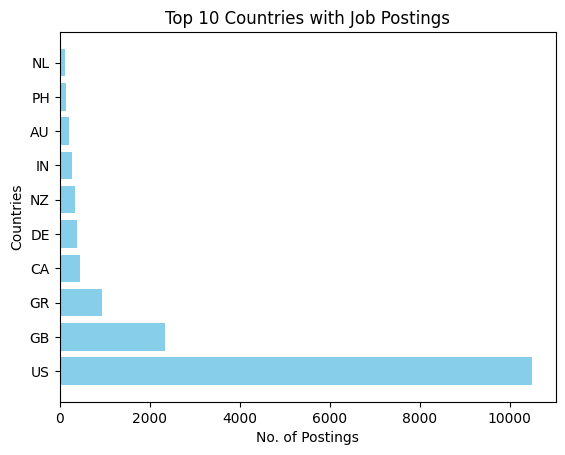

In [26]:
# Visualization of Country Posting Data
countries = ['US', 'GB', 'GR', 'CA', 'DE', 'NZ', 'IN', 'AU', 'PH', 'NL']
values = [10495, 2336, 939, 450, 382, 330, 274, 213, 132, 126]

# Create a horizontal bar graph
plt.barh(countries, values, color='skyblue')

# Add labels and title
plt.xlabel('No. of Postings')
plt.ylabel('Countries')
plt.title('Top 10 Countries with Job Postings')

# Show the plot
plt.show()